<a href="https://colab.research.google.com/github/FaraazArsath/Multiple-Linear-Regression/blob/main/Multiple_Regression_Practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting "Petrol Consumption"**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('petrol_consumption.csv')
print(df.shape)
df.head()

(48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


**checking for missing values**

In [ ]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

**removing duplicates**

In [ ]:
df.drop_duplicates()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


**finding data type**

In [ ]:
df.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

**finding outliers**

In [ ]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
IQR = df.Petrol_tax.quantile(0.75) - df.Petrol_tax.quantile(0.25)
upper_threshold = df.Petrol_tax.quantile(0.75) + (1.5 * IQR)
lower_threshold = df.Petrol_tax.quantile(0.25) - (1.5 * IQR)
print(upper_threshold)
print(lower_threshold)
maximim = df.Petrol_tax.max()
minimum = df.Petrol_tax.min()
if upper_threshold > maximim :
  print("No outliers in upper threshold value of Petrol_tax")
else:
  print("Outliers in upper threshold value of Petrol_tax")

if lower_threshold < minimum :
  print("No outliers in lower threshold value of Petrol_tax")
else:
  print("Outliers in lower threshold value of Petrol_tax")

9.8125
5.3125
Outliers in upper threshold value of Petrol_tax
Outliers in lower threshold value of Petrol_tax


In [ ]:
IQR = df.Average_income.quantile(0.75) - df.Average_income.quantile(0.25)
upper_threshold = df.Average_income.quantile(0.75) + (1.5 * IQR)
lower_threshold = df.Average_income.quantile(0.25) - (1.5 * IQR)
print(upper_threshold)
print(lower_threshold)
maximim = df.Average_income.max()
minimum = df.Average_income.min()
if upper_threshold > maximim :
  print("No outliers in upper threshold value of Average_income")
else:
  print("Outliers in upper threshold value of Average_income")

if lower_threshold < minimum :
  print("No outliers in lower threshold value of Average_income")
else:
  print("Outliers in lower threshold value of Average_income")

5838.375
2479.375
No outliers in upper threshold value of Average_income
No outliers in lower threshold value of Average_income


In [ ]:
IQR = df.Paved_Highways.quantile(0.75) - df.Paved_Highways.quantile(0.25)
upper_threshold = df.Paved_Highways.quantile(0.75) + (1.5 * IQR)
lower_threshold = df.Paved_Highways.quantile(0.25) - (1.5 * IQR)
print(upper_threshold)
print(lower_threshold)
maximim = df.Paved_Highways.max()
minimum = df.Paved_Highways.min()
if upper_threshold > maximim :
  print("No outliers in upper threshold value of Paved_Highways")
else:
  print("Outliers in upper threshold value of Paved_Highways")

if lower_threshold < minimum :
  print("No outliers in lower threshold value of Paved_Highways")
else:
  print("Outliers in lower threshold value of Paved_Highways")

13224.625
-2958.375
Outliers in upper threshold value of Paved_Highways
No outliers in lower threshold value of Paved_Highways


In [ ]:
IQR = df['Population_Driver_licence(%)'].quantile(0.75) - df['Population_Driver_licence(%)'].quantile(0.25)
upper_threshold = df['Population_Driver_licence(%)'].quantile(0.75) + (1.5 * IQR)
lower_threshold = df['Population_Driver_licence(%)'].quantile(0.25) - (1.5 * IQR)
print(upper_threshold)
print(lower_threshold)
maximim = df['Population_Driver_licence(%)'].max()
minimum = df['Population_Driver_licence(%)'].min()
if upper_threshold > maximim :
  print("No outliers in upper threshold value of Population_Driver_licence(%)")
else:
  print("Outliers in upper threshold value of Population_Driver_licence(%)")

if lower_threshold < minimum :
  print("No outliers in lower threshold value of Population_Driver_licence(%)")
else:
  print("Outliers in lower threshold value of Population_Driver_licence(%)")

0.6934999999999998
0.4315000000000002
Outliers in upper threshold value of Population_Driver_licence(%)
No outliers in lower threshold value of Population_Driver_licence(%)


**Checking whether features data is 'continous' or 'discrete'**

In [ ]:
df.shape

(48, 5)

In [ ]:
print(df.Petrol_tax.nunique())
print(df.Petrol_tax.unique())

9
[ 9.    7.5   8.   10.    7.    8.5   6.58  5.    6.  ]


In [ ]:
df.Average_income.nunique()

47

In [ ]:
df.Paved_Highways.nunique()

47

In [ ]:
df['Population_Driver_licence(%)'].nunique()

39

**EDA**

*Petrol tax VS Petrol consumption*

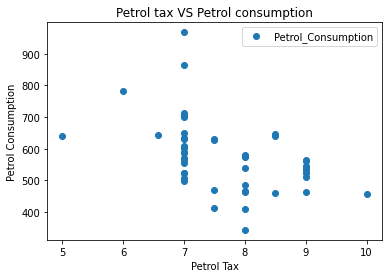

In [ ]:
df.plot(x ="Petrol_tax",y = "Petrol_Consumption",style ="o")
plt.xlabel("Petrol Tax")
plt.ylabel("Petrol Consumption")
plt.title("Petrol tax VS Petrol consumption")
plt.show()

'Petrol tax' column having discrete dataset, hence we going to  use groupby fn to analyse plot

In [ ]:
df.groupby('Petrol_tax')['Petrol_Consumption'].mean()

Petrol_tax
5.00     640.000000
6.00     782.000000
6.58     644.000000
7.00     631.736842
7.50     536.000000
8.00     502.000000
8.50     582.666667
9.00     530.875000
10.00    457.000000
Name: Petrol_Consumption, dtype: float64

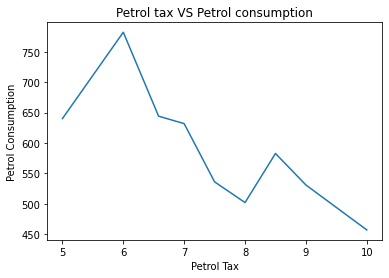

In [ ]:
df.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
plt.xlabel("Petrol Tax")
plt.ylabel("Petrol Consumption")
plt.title("Petrol tax VS Petrol consumption")
plt.show()

In [ ]:
df[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


1) Is there any relationship between the feature and target - Yes
2) Is there any linear relationship between the feature and target - Yes
3) No transformation is required

Negative correlation exists. Thus there is linear relationship between Petrol tax and Petrol Consumption

As Petrol tax increases,Petrol comsumption decreases which is in-line with our general knowledge

*Average income VS Petrol consumption*

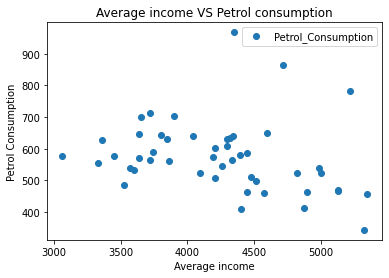

In [ ]:
df.plot(x ="Average_income",y = "Petrol_Consumption",style ="o")
plt.xlabel("Average income")
plt.ylabel("Petrol Consumption")
plt.title("Average income VS Petrol consumption")
plt.show()

In [ ]:
df[['Average_income','Petrol_Consumption']].corr()

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


1) Is there any relationship between the feature and target - Yes 2) Is there any linear relationship between the feature and target - Yes 3) No transformation is required

Negative correlation exists. Thus there is linear relationship between Average Income and Petrol Consumption

As Average income increases,Petrol comsumption decreases which is not in-line with our general knowledge

*Paved Highways VS Petrol consumption*

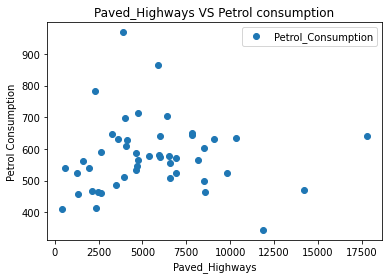

In [ ]:
df.plot(x ="Paved_Highways",y = "Petrol_Consumption",style ="o")
plt.xlabel("Paved_Highways")
plt.ylabel("Petrol Consumption")
plt.title("Paved_Highways VS Petrol consumption")
plt.show()

In [ ]:
df[['Paved_Highways','Petrol_Consumption']].corr()

,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.019042
Petrol_Consumption,0.019042,1.000000


Since correlation does not indicate linear relationship. we have to do transformation of data and check correlations.

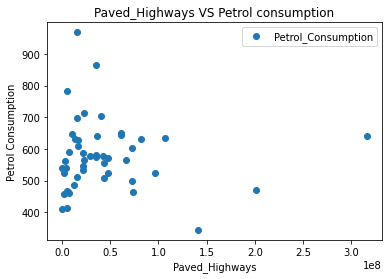

In [ ]:
df['Paved_Highways_transform'] = np.power(df['Paved_Highways'],2)
df.plot(x ="Paved_Highways_transform",y = "Petrol_Consumption",style ="o")
plt.xlabel("Paved_Highways")
plt.ylabel("Petrol Consumption")
plt.title("Paved_Highways VS Petrol consumption")
plt.show()

In [ ]:
df[['Paved_Highways_transform','Petrol_Consumption']].corr()

,Paved_Highways_transform,Petrol_Consumption
Paved_Highways_transform,1.000000,-0.046976
Petrol_Consumption,-0.046976,1.000000


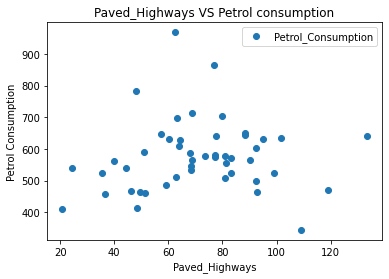

In [ ]:
df['Paved_Highways_transform'] = np.power(df['Paved_Highways'],0.5)
df.plot(x ="Paved_Highways_transform",y = "Petrol_Consumption",style ="o")
plt.xlabel("Paved_Highways")
plt.ylabel("Petrol Consumption")
plt.title("Paved_Highways VS Petrol consumption")
plt.show()

In [ ]:
df[['Paved_Highways_transform','Petrol_Consumption']].corr()

,Paved_Highways_transform,Petrol_Consumption
Paved_Highways_transform,1.000000,0.086698
Petrol_Consumption,0.086698,1.000000


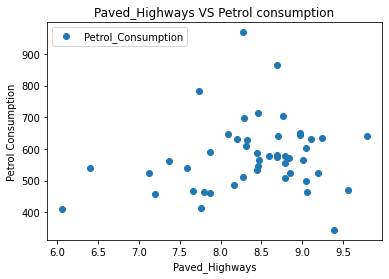

In [ ]:
df['Paved_Highways_transform'] = np.log(df['Paved_Highways'])
df.plot(x ="Paved_Highways_transform",y = "Petrol_Consumption",style ="o")
plt.xlabel("Paved_Highways")
plt.ylabel("Petrol Consumption")
plt.title("Paved_Highways VS Petrol consumption")
plt.show()

In [ ]:
df[['Paved_Highways_transform','Petrol_Consumption']].corr()

,Paved_Highways_transform,Petrol_Consumption
Paved_Highways_transform,1.000000,0.165384
Petrol_Consumption,0.165384,1.000000


After doing all transformation to Paved Highways, we found there is no relationship between Paved Highways and Petrol Consumption

Decided to drop this feature

*Population Driver licence(%) VS Petrol Consumption*

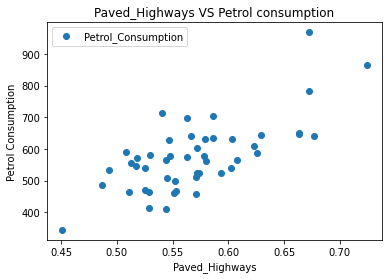

In [ ]:
df.plot(x ="Population_Driver_licence(%)",y = "Petrol_Consumption",style ="o")
plt.xlabel("Paved_Highways")
plt.ylabel("Petrol Consumption")
plt.title("Paved_Highways VS Petrol consumption")
plt.show()

In [ ]:
df[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


1) Is there any relationship between the feature and target - Yes 2) Is there any linear relationship between the feature and target - Yes 3) No transformation is required

Positive correlation exits. There is linear relationship between Population_Driver_licence(%)	and Petrol Consumption

**Preparing data for the model**

In [ ]:
X = df[['Petrol_tax','Average_income','Population_Driver_licence(%)']].values
y = df['Petrol_Consumption'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =200)

In [ ]:
X_test

array([[7.000e+00, 3.640e+03, 5.180e-01],
       [7.000e+00, 3.333e+03, 5.130e-01],
       [9.000e+00, 3.601e+03, 4.930e-01],
       [7.000e+00, 3.897e+03, 5.860e-01],
       [7.000e+00, 3.718e+03, 5.400e-01],
       [7.000e+00, 4.593e+03, 6.630e-01],
       [7.000e+00, 5.002e+03, 5.930e-01],
       [7.000e+00, 3.745e+03, 5.080e-01],
       [7.000e+00, 4.716e+03, 7.240e-01],
       [1.000e+01, 5.342e+03, 5.710e-01]])

In [ ]:
y_test

array([571, 554, 534, 704, 714, 649, 524, 591, 865, 457])

In [ ]:
X_train.shape,X_test.shape

((38, 3), (10, 3))

In [ ]:
y_train.shape,y_test.shape

((38,), (10,))

**Scaling the data** - Not Mandatory

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # Mean and SD are computed using training data , scaling is done only in train data

StandardScaler()

In [ ]:
'''Fitting the entire dataset to the standard scaler object causes the model to learn about test set.
 However, models are not supposed to learn anything about test set. 
It destroys the purpose of train-test split. In general, this issue is called data leakage.'''



'''When we transform the test set, the features will not have exactly zero mean and unit standard deviation 
because the scaler used in transformation is based on the training set. 
The amount of change in the test set is the same as in the training set.'''

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

**Modelling**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
regressor.intercept_

566.3684210526317

In [ ]:
regressor.coef_

array([-25.2502948 , -30.40613998,  70.21042177])

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Petrol_tax','Average_income','Population_Driver_licence(%)'],columns = ['Coefficient'])
coeff_df 

,Coefficient
Petrol_tax,-25.250295
Average_income,-30.406140
Population_Driver_licence(%),70.210422


Feature importantance : Feature with highest absolute value of the coefficient is the most important feature. 

In this, Population_Driver_licence(%)	has the highest absolute value of the coefficient so it is the important feature

**Evaluating the model**

In [ ]:
y_predict = regressor.predict(X_test_scaled)
y_predict

array([547.88852034, 558.15539573, 459.59718153, 628.97619913,
       574.41270972, 697.98273455, 576.56769975, 527.92008763,
       776.78124906, 443.46583667])

In [ ]:
df_Prediction = pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
df_Prediction

,Actual,Predicted
0,571,547.888520
1,554,558.155396
2,534,459.597182
3,704,628.976199
4,714,574.412710
5,649,697.982735
6,524,576.567700
7,591,527.920088
8,865,776.781249
9,457,443.465837


In [ ]:
from sklearn import metrics
metrics.r2_score(y_test,y_predict)

0.6208178974348757

R2 - value is 0.620 which says the model is better